In [2]:
import tensorflow as tf

a = tf.constant(True)
print(a==True)

tf.Tensor(True, shape=(), dtype=bool)


In [5]:
x = tf.random.normal([4, 32, 32, 3])
print(x[0])

tf.Tensor(
[[[-1.1048955   0.5259212   0.610781  ]
  [-0.46893376 -1.8762363  -0.27188945]
  [ 1.3464342   0.6663173  -0.8020809 ]
  ...
  [-0.19193782  1.5070964   1.3511734 ]
  [ 0.4281431  -0.6359788  -0.5052536 ]
  [ 0.882901    0.22917502 -0.31872225]]

 [[ 0.02049025  0.15506686  0.17524767]
  [-2.391203    0.5140911   1.0650717 ]
  [-0.99272245  1.2148507   0.25283635]
  ...
  [ 0.95047045 -1.2363143  -0.45729586]
  [ 0.6387812   0.82803065  1.4139162 ]
  [-1.1029589   2.1473486  -0.22858532]]

 [[-0.27064246  0.9818341   1.3655819 ]
  [ 1.2254589   0.20631474 -0.2605797 ]
  [ 1.6820889  -0.31198648 -0.1264861 ]
  ...
  [-0.68274534 -0.8873983   0.80449086]
  [-0.55744374 -1.0927429   1.1862202 ]
  [-0.7766379   1.1418355   0.72826296]]

 ...

 [[-2.0906997   1.2036798   0.5826977 ]
  [-0.33833286  0.10207876  0.95162857]
  [ 0.3732567  -1.0032253   0.43498483]
  ...
  [-0.01659906  0.15893577  0.21935898]
  [-2.1537015  -0.14523208  2.7975633 ]
  [-0.97257614 -0.04321784  0.534

In [4]:
a = tf.random.uniform([4,3,23,32])
b = tf.random.uniform([4,3,32,2])
print(a@b)

tf.Tensor(
[[[[ 8.260974   9.265581 ]
   [ 8.542305   9.363273 ]
   [ 9.3571    10.336818 ]
   [ 7.459076   7.573979 ]
   [ 7.477975   9.540114 ]
   [ 6.756223   9.009526 ]
   [ 7.57049    7.7548532]
   [ 8.844326   8.467537 ]
   [ 8.705332   8.1954155]
   [10.1951065 10.78682  ]
   [ 8.112617   8.416813 ]
   [ 7.1588516  7.867851 ]
   [ 8.025425   8.78543  ]
   [ 5.9206767  7.7372203]
   [ 9.070684   9.902487 ]
   [ 7.3471904  8.107028 ]
   [ 9.052745   9.870139 ]
   [ 8.945067  10.042375 ]
   [ 9.183996  10.153318 ]
   [ 7.25313    7.911694 ]
   [ 8.148498   8.722865 ]
   [ 8.857268  10.670651 ]
   [ 7.2390294  8.290372 ]]

  [[ 5.4467874  6.8645926]
   [ 6.6506333  7.4274807]
   [ 6.7236686  7.8587136]
   [ 5.871555   7.0730104]
   [ 7.9516034  8.990926 ]
   [ 6.9607434  7.252922 ]
   [ 6.6917853  9.085274 ]
   [ 6.7579756  9.745816 ]
   [ 7.8729663  8.734486 ]
   [ 8.782803  10.048563 ]
   [ 6.9209986  8.909039 ]
   [ 5.921702   6.6781726]
   [ 8.094345   9.165295 ]
   [ 6.429584  

In [1]:
## 前向传播 练习
import tensorflow as tf

traindata, valdata = tf.keras.datasets.mnist.load_data()
trainx, trainy = traindata
valx, valy = valdata
lr = 0.001

w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
b1 = tf.Variable(tf.zeros([256]))
w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
b2 = tf.Variable(tf.zeros([128]))
w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
b3 = tf.Variable(tf.zeros([10]))


trainx = tf.reshape(trainx, [-1, 28*28])
trainx = tf.cast(trainx, tf.float32)
trainx = trainx / 255
trainy = tf.one_hot(trainy, depth=10)

all_loss = []

#构建前向传播
for i in range(1000):
    with tf.GradientTape() as tape:
        h1 = trainx@w1+b1
        h1 = tf.nn.relu(h1)
        h2 = h1@w2 + b2
        h2 = tf.nn.relu(h2)
        out = h2@w3 + b3

        loss = tf.square(trainy-out)
        loss = tf.reduce_mean(loss)
        all_loss.append(loss)
    grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])
    
    #更新参数
    w1.assign_sub(lr * grads[0])
    b1.assign_sub(lr * grads[1])
    w2.assign_sub(lr * grads[2])
    b2.assign_sub(lr * grads[3])
    w3.assign_sub(lr * grads[4])
    b3.assign_sub(lr * grads[5])
    
    if i%50==0:
        print('steps {}, loss {}'.format(i, loss))

steps 0, loss 0.39085671305656433
steps 50, loss 0.2647005617618561
steps 100, loss 0.21567535400390625
steps 150, loss 0.19305410981178284
steps 200, loss 0.18093936145305634
steps 250, loss 0.17342151701450348
steps 300, loss 0.16808030009269714
steps 350, loss 0.16385625302791595
steps 400, loss 0.16026239097118378
steps 450, loss 0.15706117451190948
steps 500, loss 0.15413162112236023
steps 550, loss 0.15140946209430695
steps 600, loss 0.14885680377483368
steps 650, loss 0.14644880592823029
steps 700, loss 0.1441689282655716
steps 750, loss 0.1420046091079712
steps 800, loss 0.13994638621807098
steps 850, loss 0.1379861682653427
steps 900, loss 0.13611741364002228
steps 950, loss 0.13433264195919037


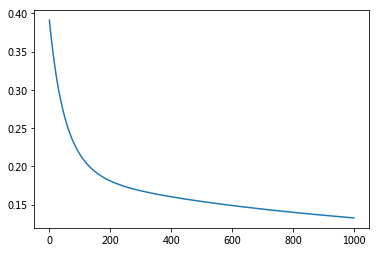

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(1000), np.array(all_loss))
plt.show()